<a href="https://colab.research.google.com/github/TANJALISHIVANIREDDY/Asteroid-detection/blob/main/Light_curve_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
pip install pyLCSIM --upgrade


  Created wheel for pyLCSIM: filename=pyLCSIM-0.4.0-py3-none-any.whl size=11673 sha256=2f2be8bae6410f116ae0f5deaf943c89b0c44f16df19c6e35863a801aba02afd
  Stored in directory: /root/.cache/pip/wheels/76/b4/f5/766fc76f2aa1bd06641be1306bc6e6b423d1859fcca2364896
Successfully built pyLCSIM


tar xzvf pyLCSIM-0.x.y.tar.gz

cd pyLCSIM-0.x.y

python setup.py install

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pyLCSIM

In [9]:
rate_src    = 30000.0
rate_bkg    = 5000.0
t_exp       = 50.0
dt          = 0.01
frms        = 0.1

In [10]:
nbins = t_exp/dt

In [11]:
sim = pyLCSIM.Simulation()

# Add two PSD models: a smooth broken power law and a Lorentzian representing a QPO.
# See the documentation for details.
sim.addModel('smoothbknpo', [1., 1, 2, 1])
sim.addModel('lorentzian', [10., 1., 10, 2])

# Run the simulation
sim.run(dt, nbins, rate_src, rms=frms)

# Add Poisson noise to the light curve
sim.poissonRandomize(dt, rate_bkg)

# Get lightcurve and power spectrum as 1-D arrays
time, rate = sim.getLightCurve()
f, psd = sim.getPowerSpectrum()


Total number of photons: 1752049.0


In [12]:
pyLCSIM.saveFITSLC("myLC.fits", time, rate)
pyLCSIM.saveFITSPSD("myPSD.fits", f, psd)

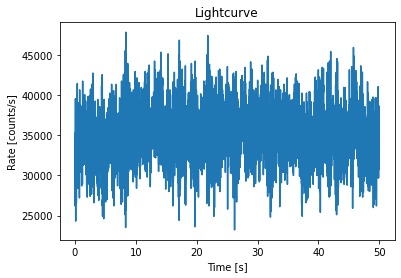

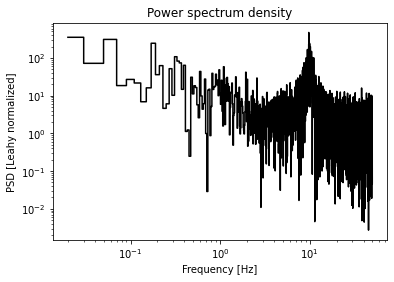

In [13]:
fig0 = plt.figure()
plt.plot(time, rate)
plt.xlabel("Time [s]")
plt.ylabel("Rate [counts/s]")
plt.title("Lightcurve")

fig1 = plt.figure()
plt.loglog(f, psd, drawstyle='steps-mid', color='black')
plt.xlabel("Frequency [Hz]")
plt.ylabel("PSD [Leahy normalized]")
plt.title("Power spectrum density")

plt.show()

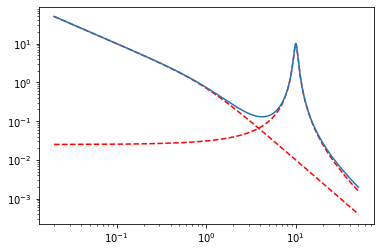

In [14]:
freq_m, model_tot, model_comp = sim.getPSDModel(dt, nbins)
plt.figure()
for mod in model_comp:
        # Plot the various additive component as dashed lines
        plt.loglog(freq_m, mod, ls='dashed', color='red')
# Plot the total model
plt.loglog(freq_m, model_tot)
plt.show()